Nama: Nadhifi Qurrunul B F H

Nim: 1103204156

**Data pengeluaran tahunan pada berbagai kategori produk oleh pelanggan grosir.**

In [12]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score




In [13]:
# Membaca dataset ke dalam DataFrame
df = pd.read_csv('Wholesale_customers.csv')
# Menampilkan beberapa baris pertama dataset
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
# Menggunakan metode rename
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})


In [15]:
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [17]:
# Menggunakan metode drop untuk menghapus kolom
df = df.drop(columns=['Channel', 'Region'])


In [18]:
# Menggunakan operasi slicing untuk memilih kolom yang akan disimpan
df = df[['Fresh', 'Milk', 'Grocery']]
df.head()


,Fresh,Milk,Grocery
0,12669,9656,7561
1,7057,9810,9568
2,6353,8808,7684
3,13265,1196,4221
4,22615,5410,7198


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

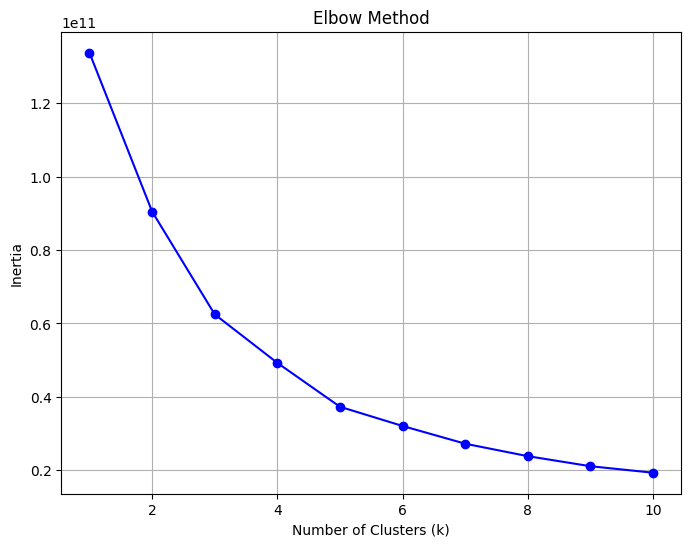

In [19]:
# Memilih kolom yang akan digunakan untuk analisis klaster
data = df[['Fresh', 'Milk', 'Grocery']]

# Menyimpan nilai inersia (within-cluster sum of squares) untuk berbagai nilai k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


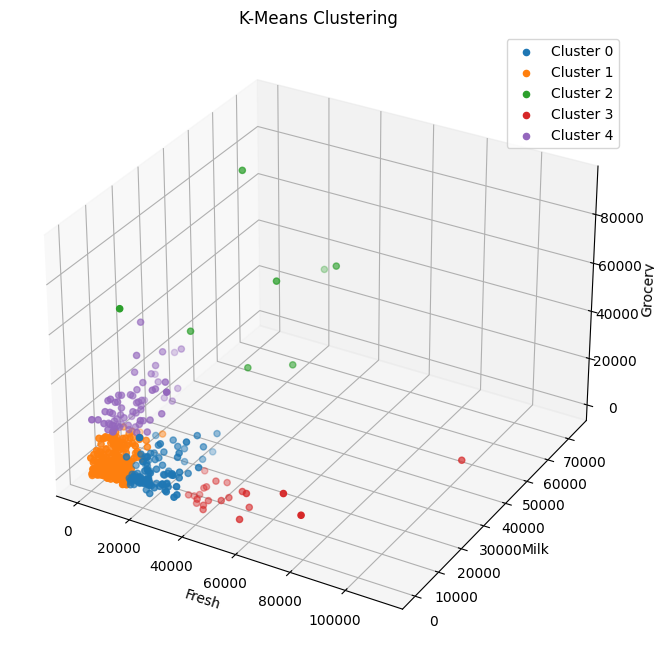

In [21]:
# Mengambil atribut yang akan digunakan untuk clustering
attributes = df[['Fresh', 'Milk', 'Grocery']]

# Menentukan jumlah kluster
n_clusters = 5

# Membuat model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Melakukan clustering
labels = kmeans.fit_predict(attributes)

# Menambahkan kolom 'label' ke DataFrame df
df['label'] = labels

# Visualisasi hasil clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in range(n_clusters):
    cluster = df[df['label'] == label]
    ax.scatter(cluster['Fresh'], cluster['Milk'], cluster['Grocery'], label=f'Cluster {label}')

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')
ax.set_title('K-Means Clustering')
plt.legend()
plt.show()


In [22]:
# Ambil data dari DataFrame Anda (pastikan Anda sudah membaca datanya sebelumnya)
# Misalkan Anda menyimpannya dalam DataFrame df

# Data yang digunakan untuk clustering (misalnya, hanya kolom Annual Income dan Spending Score)
data = df[['Milk', 'Grocery']].values

# Daftar nilai K yang ingin diuji
k_values = list(range(2, 11))

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Melakukan iterasi untuk setiap nilai K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan hasil
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette Score for K={k}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for K=2: 0.6961488782412818
Silhouette Score for K=3: 0.5925874586005887
Silhouette Score for K=4: 0.5536088450413759
Silhouette Score for K=5: 0.5543864043242497
Silhouette Score for K=6: 0.5235683423385786
Silhouette Score for K=7: 0.5297562149636941
Silhouette Score for K=8: 0.5174989021778283
Silhouette Score for K=9: 0.45237672174666116
Silhouette Score for K=10: 0.4547722633853422


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Ambil data dari DataFrame Anda (pastikan Anda sudah membaca datanya sebelumnya)
# Misalkan Anda menyimpannya dalam DataFrame df

# Data yang digunakan untuk clustering (misalnya, hanya kolom Annual Income dan Spending Score)
data = df[['Milk', 'Grocery']].values

# Daftar nilai K yang ingin diuji
k_values = list(range(2, 11))

# Inisialisasi list untuk menyimpan nilai Davies-Bouldin Index
davies_bouldin_scores = []

# Melakukan iterasi untuk setiap nilai K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    davies_bouldin_avg = davies_bouldin_score(data, labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Menampilkan hasil
for k, score in zip(k_values, davies_bouldin_scores):
    print(f"Davies-Bouldin Index for K={k}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for K=2: 0.712134856849286
Davies-Bouldin Index for K=3: 0.7785523630334114
Davies-Bouldin Index for K=4: 0.7757217689099359
Davies-Bouldin Index for K=5: 0.7947122587679545
Davies-Bouldin Index for K=6: 0.8471243599401549
Davies-Bouldin Index for K=7: 0.7067369077961153
Davies-Bouldin Index for K=8: 0.6704500454552592
Davies-Bouldin Index for K=9: 0.7335134448965113
Davies-Bouldin Index for K=10: 0.6345631702737912


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# Ambil data dari DataFrame Anda (pastikan Anda sudah membaca datanya sebelumnya)
# Misalkan Anda menyimpannya dalam DataFrame df

# Data yang digunakan untuk clustering (misalnya, hanya kolom Annual Income dan Spending Score)
data = df[['Milk', 'Grocery']].values

# Daftar nilai K yang ingin diuji
k_values = list(range(2, 11))

# Inisialisasi list untuk menyimpan nilai Calinski-Harabasz Index
calinski_harabasz_scores = []

# Melakukan iterasi untuk setiap nilai K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    calinski_harabasz_avg = calinski_harabasz_score(data, labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

# Menampilkan hasil
for k, score in zip(k_values, calinski_harabasz_scores):
    print(f"Calinski-Harabasz Index for K={k}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for K=2: 465.39547931859175
Calinski-Harabasz Index for K=3: 497.1926857240803
Calinski-Harabasz Index for K=4: 524.1214492818489
Calinski-Harabasz Index for K=5: 498.91272139412234
Calinski-Harabasz Index for K=6: 515.3957601112521
Calinski-Harabasz Index for K=7: 505.683199384597
Calinski-Harabasz Index for K=8: 514.7703482065011
Calinski-Harabasz Index for K=9: 543.7486857807588
Calinski-Harabasz Index for K=10: 571.4719506211088
